In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

mycolumnnames=['Fov', 'ChID', 'lambda', 'td', 'sb', 'sd', 'deltas']
files=['glucose_12aa.txt', 'glucose_6aa.txt', 'glucose.txt', 'glycerol.txt', 'sorbitol.txt', 'synthetic_rich.txt', 'TSB.txt']

Data = {}
for file in files:
    Data[file]=pd.read_csv(file, delimiter='\t')
    Data[file].columns=mycolumnnames

# Checking basic statistics

# Interpretable AI (?)

# Visualizing data

Data comes from experiments on cell growth and division. <br>
Experiments start in different probes ("*ChID*") and each probe is monitored in different fields ("*FOV*").
In each datafile, each line corresponds to a single cell. 

It is known that cells 

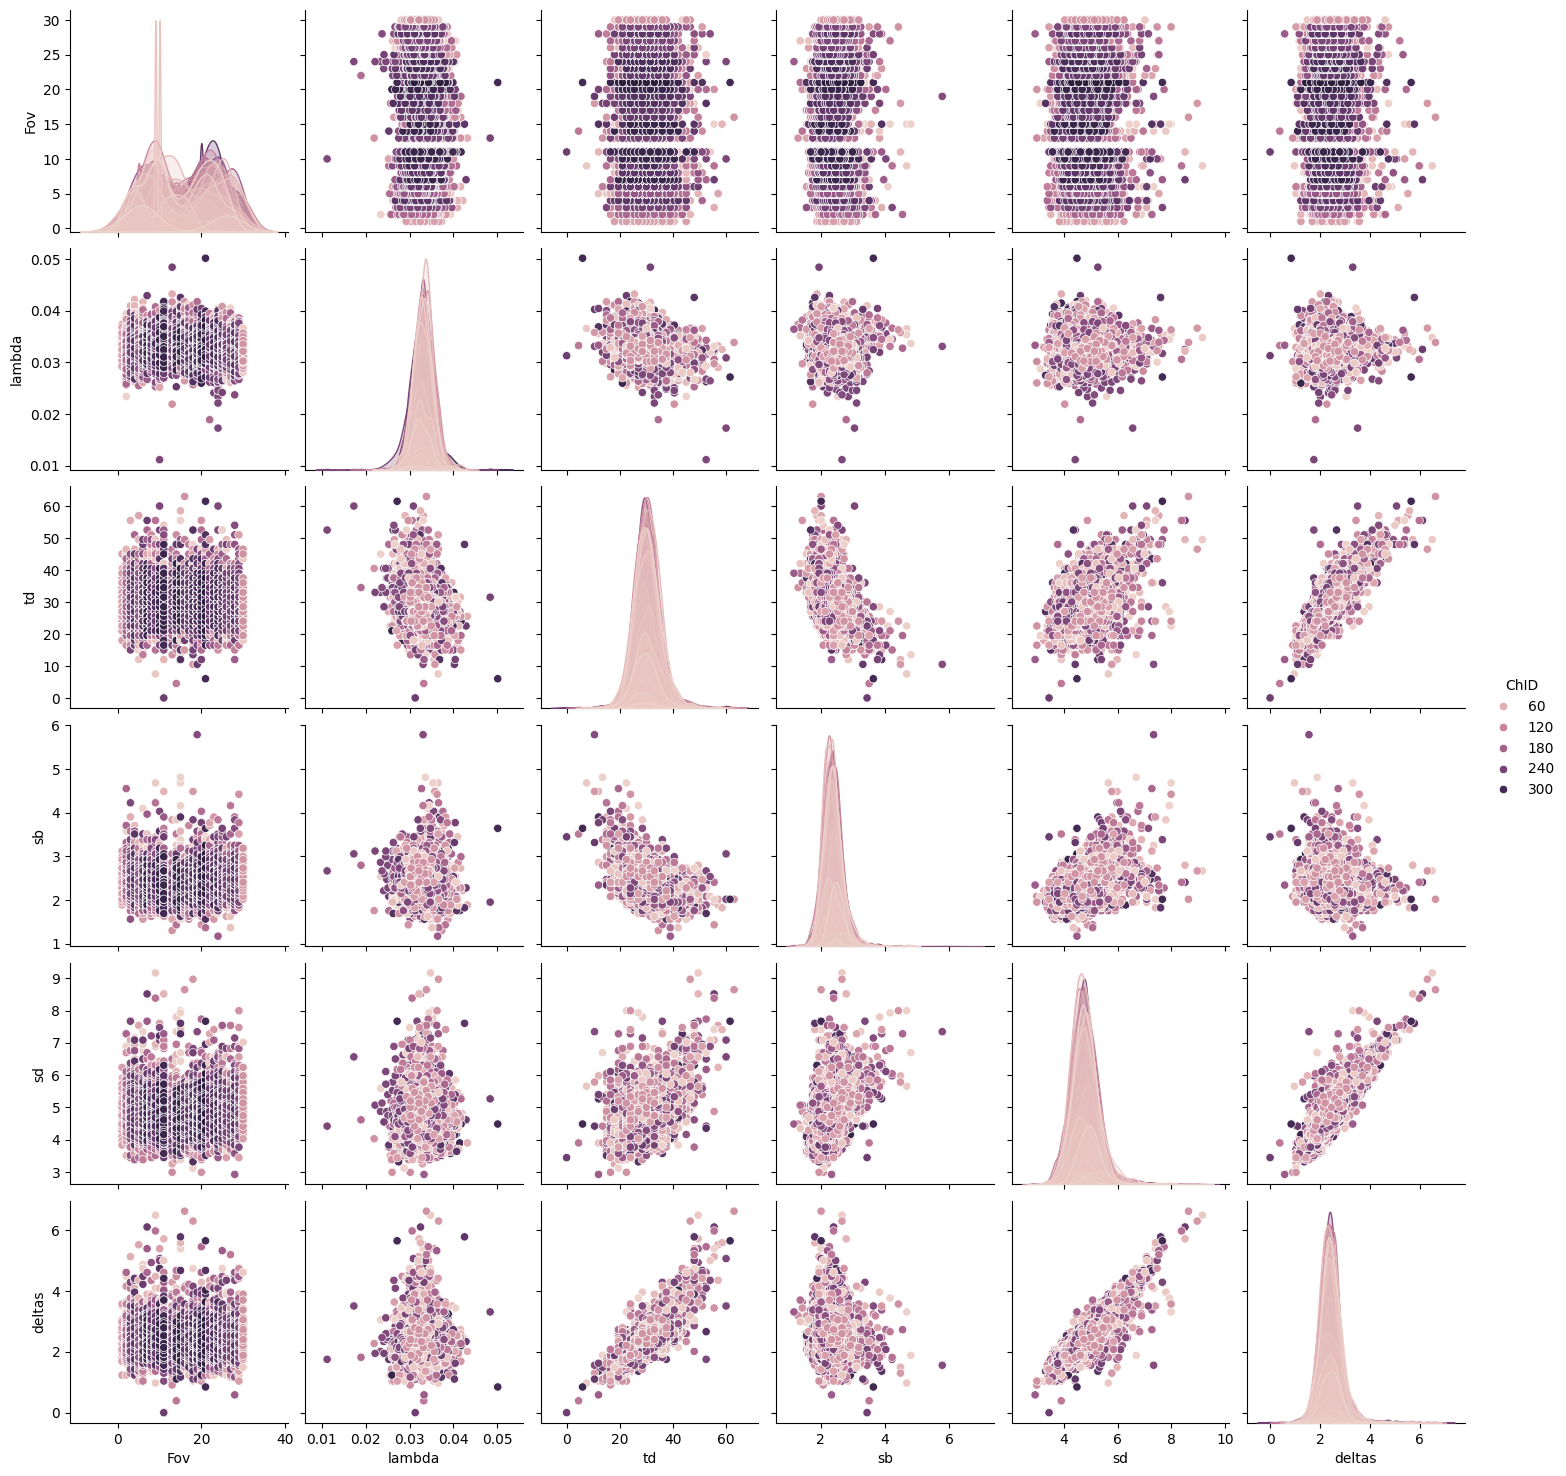

In [10]:
for file in files[1:2]:
    sns.pairplot(Data[file], hue='ChID')

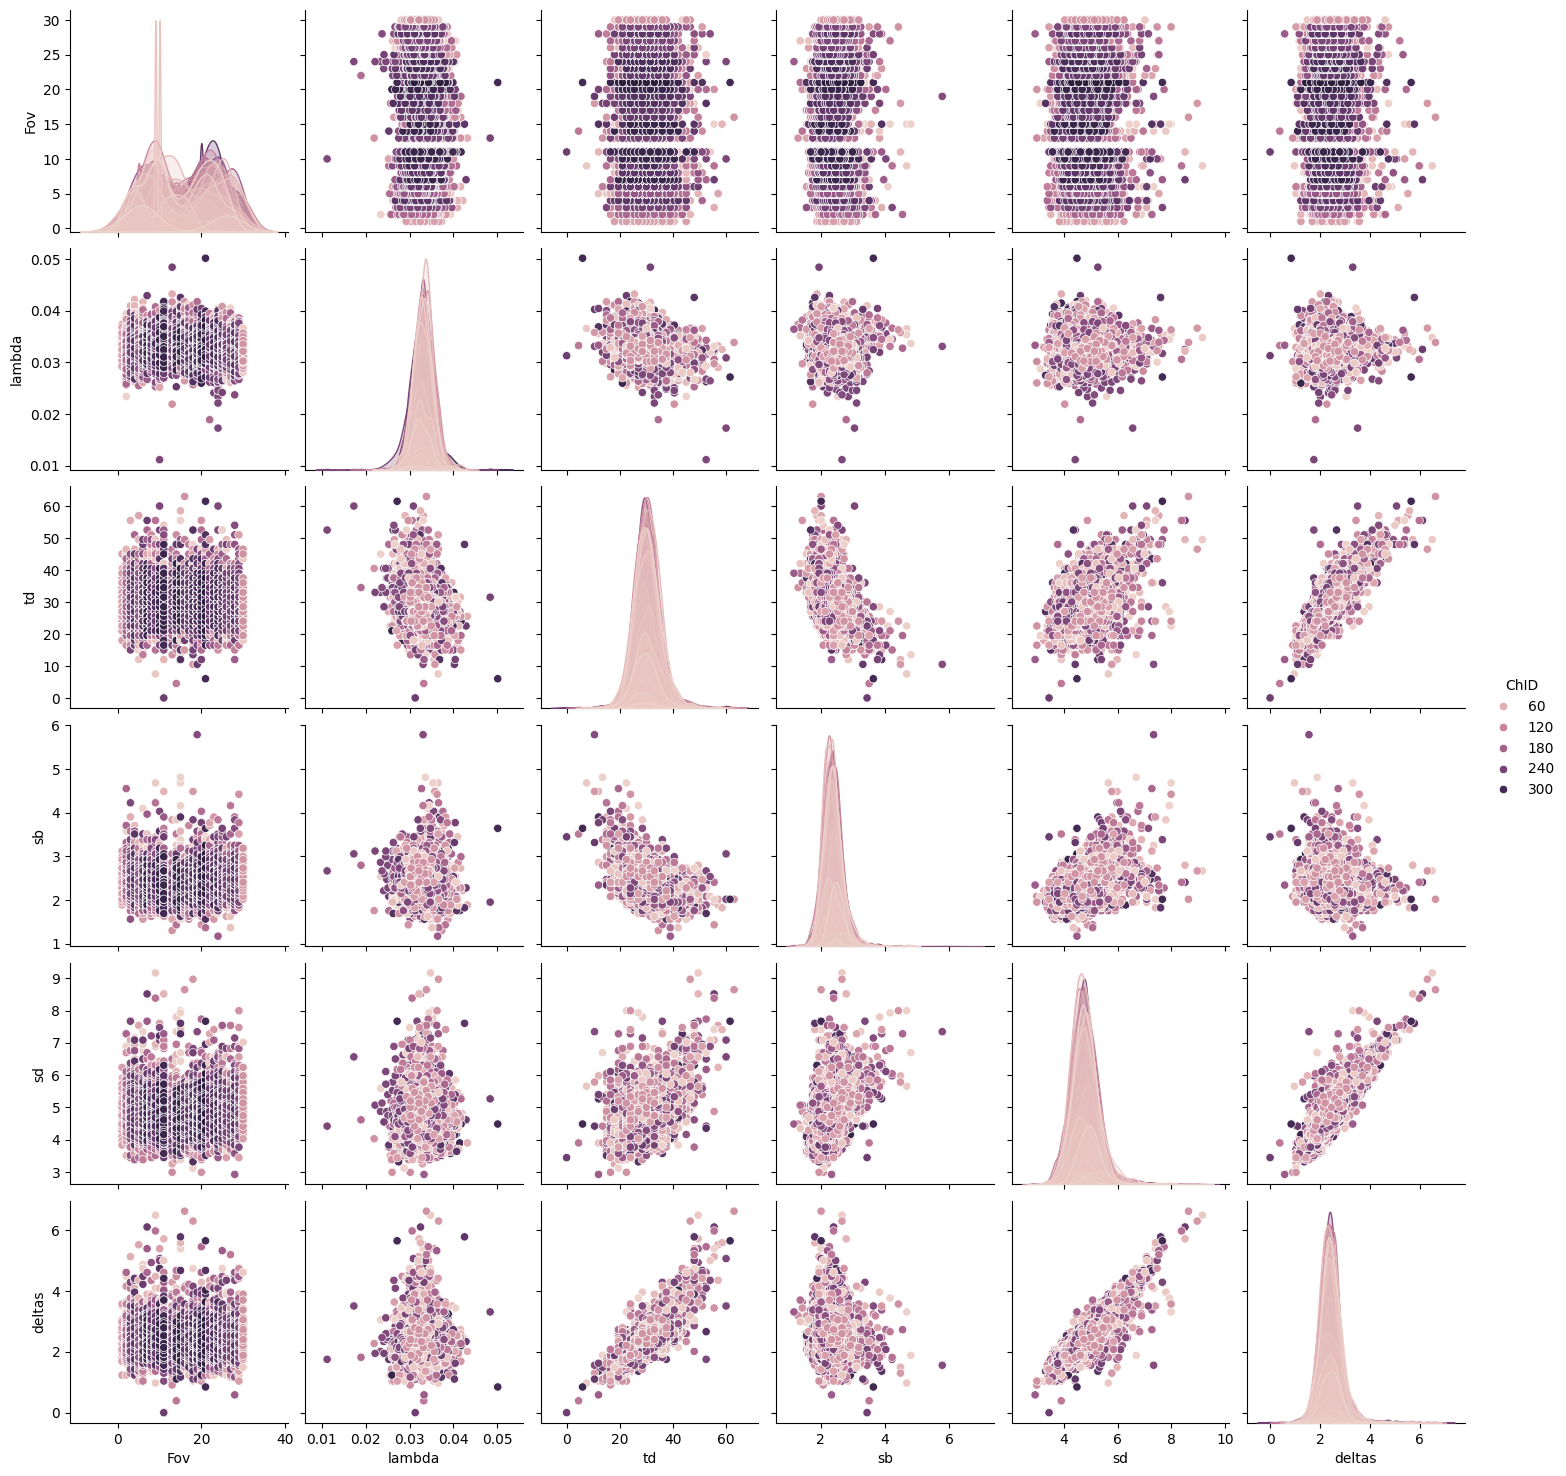

In [12]:
for file in [files[1]]:
    sns.pairplot(Data[file], hue='ChID')

In [48]:
len(Data[files[2]])

12592

<AxesSubplot:xlabel='lambda', ylabel='Count'>

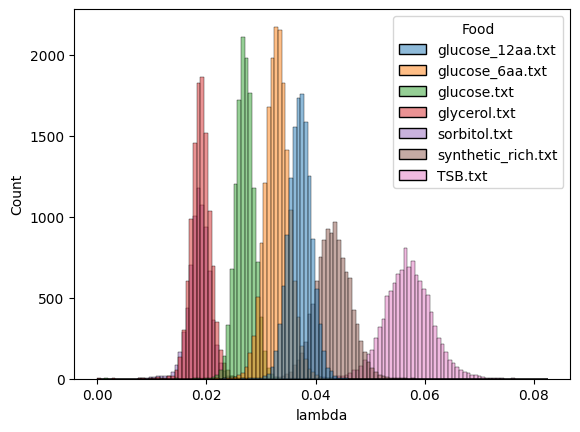

In [69]:
merged_df = pd.concat([Data[f] for f in files],ignore_index=False, keys=files, names=['Food'])
sns.histplot(data=merged_df, x="lambda", hue='Food', alpha=0.5)

(0.0, 100.0)

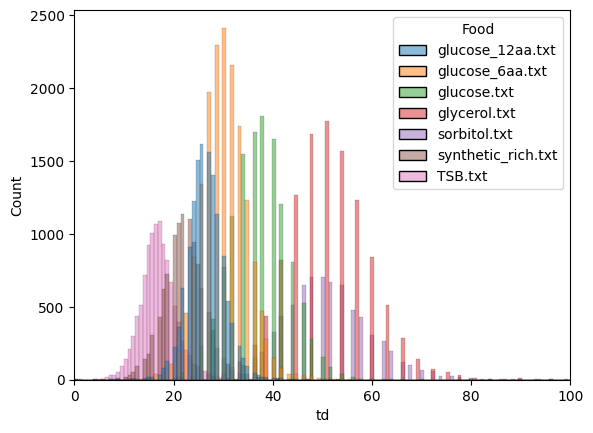

In [74]:
fig, ax = plt.subplots()
sns.histplot(data=merged_df, x="td", hue='Food', alpha=0.5)
ax.set_xlim([0, 100])

<AxesSubplot:xlabel='lambda', ylabel='Count'>

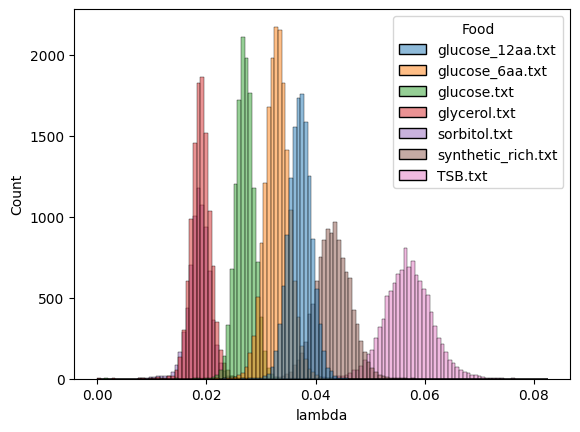

In [76]:
fig, ax = plt.subplots()
sns.histplot(data=merged_df, x="lambda", hue='Food', alpha=0.5)
#ax.set_xlim([0, 100])

In [128]:
b[b['td']>150]

,Fov,ChID,lambda,td,sb,sd,deltas
497,21,471,0.003253,267,2.145,5.655,3.510
2249,22,420,-0.000051,255,2.470,4.095,1.625
2448,22,480,0.007352,222,1.690,6.175,4.485
8944,28,130,0.001032,240,2.145,3.770,1.625


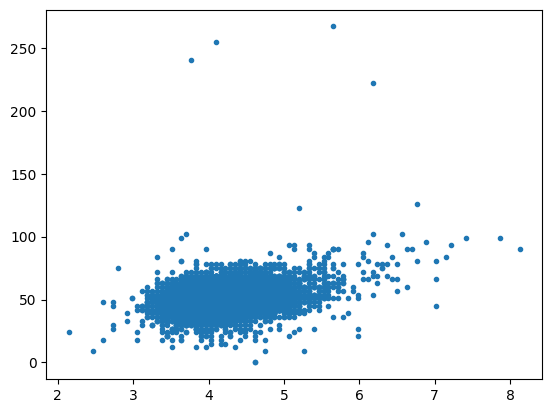

In [129]:
plt.plot(b['sd'], b['td'], '.')

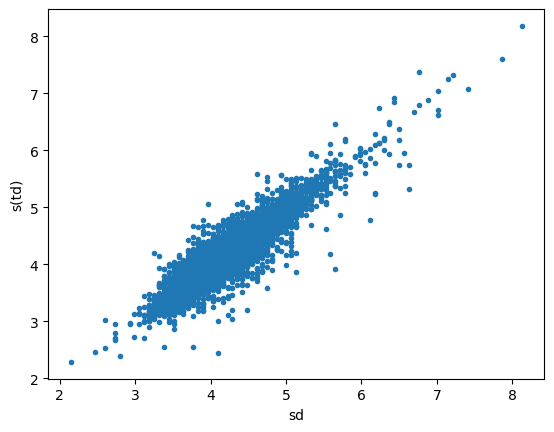

In [189]:
def st(sb, l,t):
    return sb*2**(l*t)

plt.plot(b['sd'], st(b['sb'], b['lambda'], b['td']), '.')
plt.xlabel('sd')
plt.ylabel('s(td)')
#plt.plot([4*x for x in ((b['sd']))])

predicted_sd = {}
for file in files:
    predicted_sd[file] = st(Data[file]['sb'], Data[file]['lambda'], Data[file]['td'])

#b['sd']

#st(b['sd'], b['lambda'], b['td'])

In [187]:
Data[file]['sd']

0        6.825
1        7.410
2        7.475
3        7.345
4        6.955
         ...  
11107    8.905
11108    7.020
11109    8.060
11110    8.320
11111    7.865
Name: sd, Length: 11112, dtype: float64

glucose_12aa.txt [0.98686701]
glucose_6aa.txt [0.96986241]
glucose.txt [0.96517363]
glycerol.txt [0.96045847]
sorbitol.txt [0.96687954]
synthetic_rich.txt [0.98945416]
TSB.txt [0.9931115]


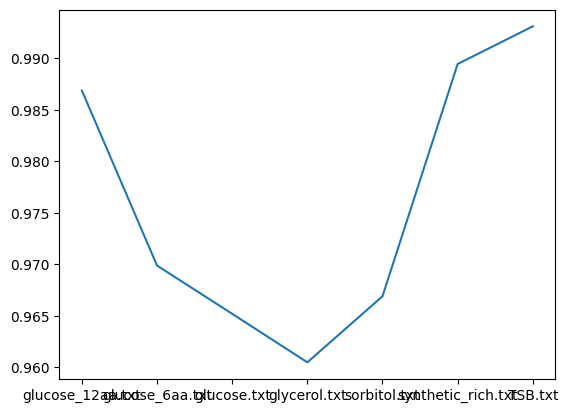

In [188]:
def get_lin_coef(x,y):
    lm = LinearRegression()
    lm.fit(x,y)
    return lm.coef_

coef={}
for file in files:
    #sns.lmplot(x='td',y='deltas',data=Data[file])
    #coef[file] = get_lin_coef(Data[file][['sd']], Data[file]['deltas'])
    coef[file] = get_lin_coef(Data[file][['sd']], predicted_sd[file])
    print(file, coef[file])
plt.plot(coef.keys(), coef.values())

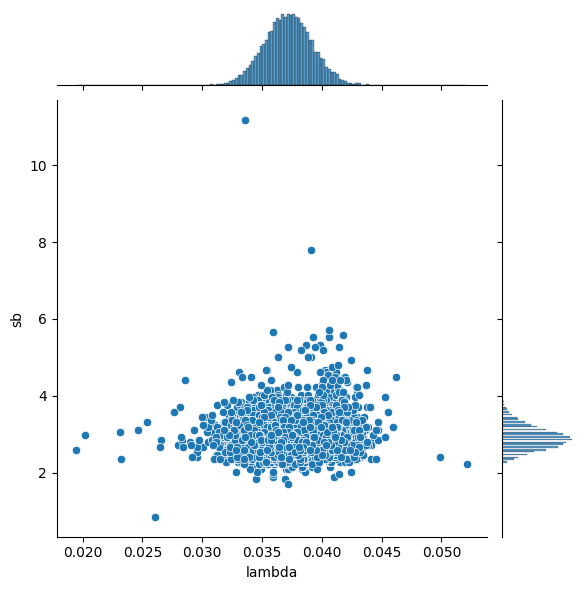

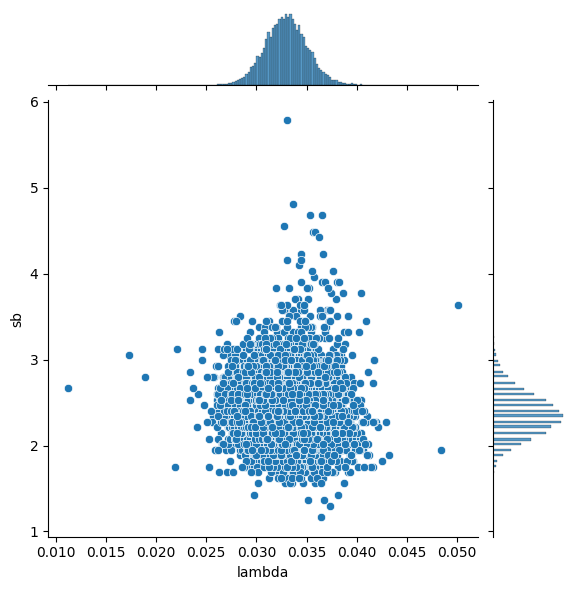

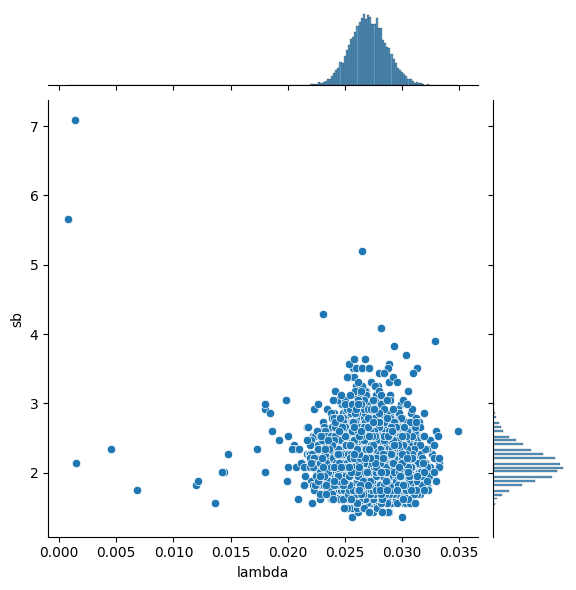

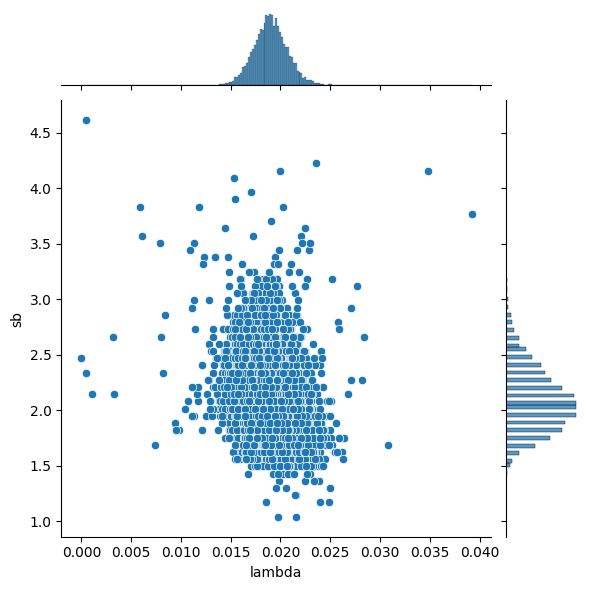

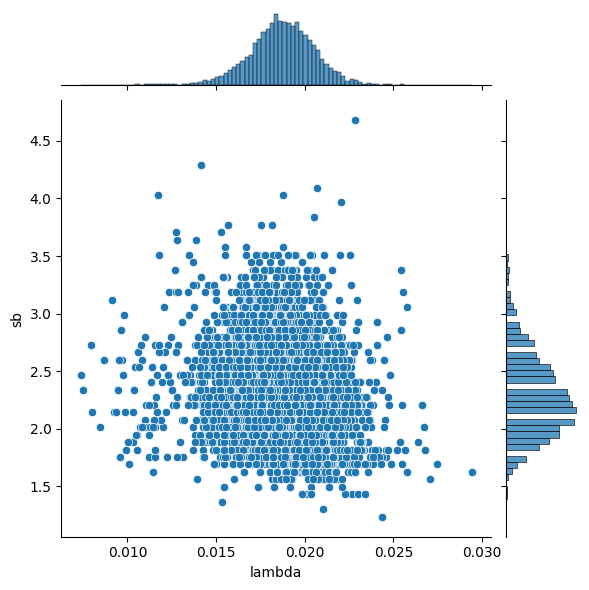

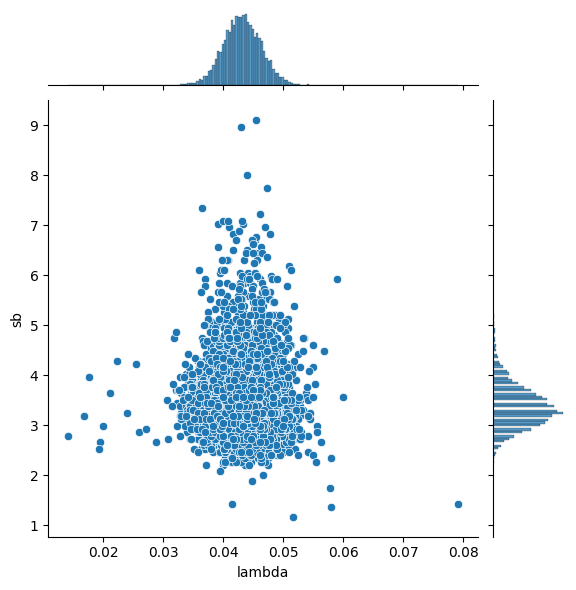

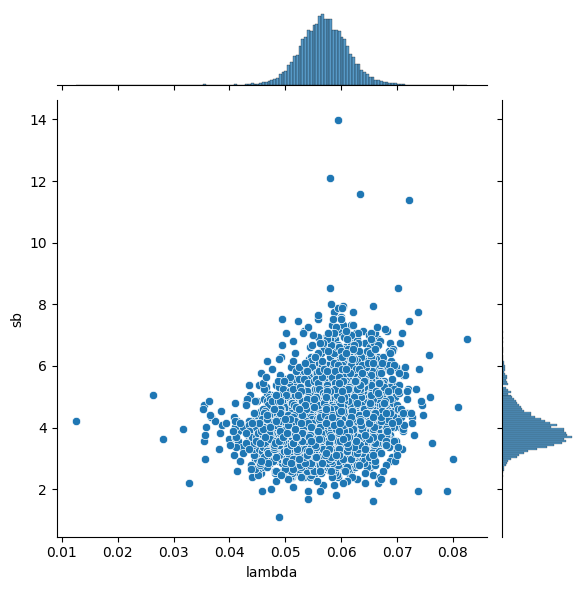

In [194]:
for file in files:
    sns.jointplot(x="lambda", y="sb", data=Data[file]) 

<AxesSubplot:xlabel='lambda', ylabel='sb'>

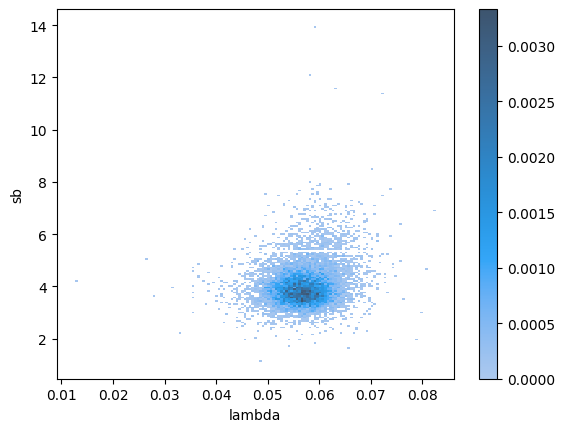

In [196]:
sns.histplot(x='lambda', y='sb', data=Data[file], stat='probability', cbar=True)

/home/joshy/.local/lib/python3.8/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='lambda', ylabel='Probability'>

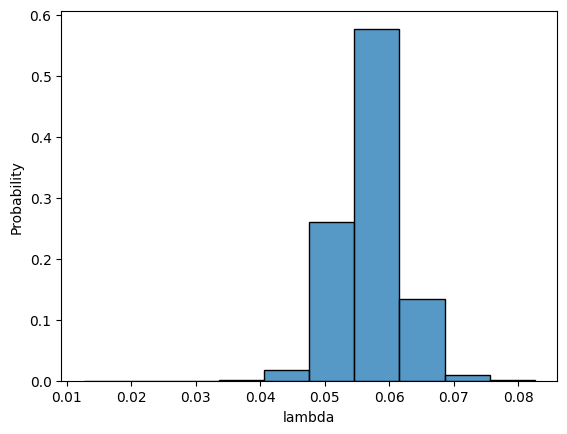

In [199]:
sns.histplot(data=Data[file], x='lambda', weights='sb', stat='probability', cbar=True)

In [205]:
Data[file].groupby(by='td')

In [239]:
data = Data[file]
maxl=np.max(data['lambda'])
sd_lambda = data.groupby(pd.cut(data['lambda'], np.arange(0,maxl+maxl/10, maxl/10)))['sd'].count()
print(sd_lambda.to_numpy())

[   0    1    0    4   27  446 6008 4363  254    9]


In [287]:
myx=np.array([1,2])
myy=np.array([0.5, 0.5])
print(np.sum(myx*myy))
print(np.array([1/6]*6))

1.5
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


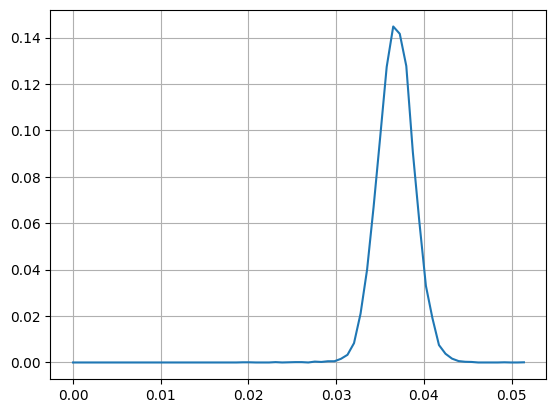

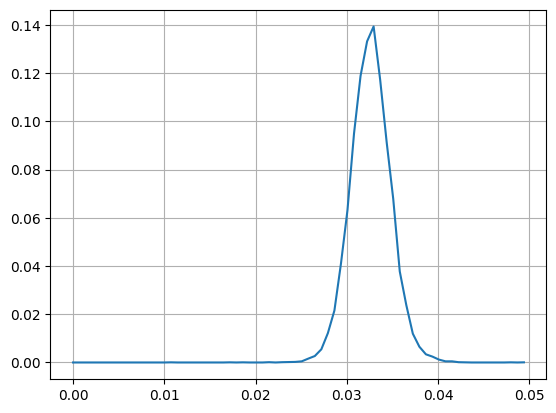

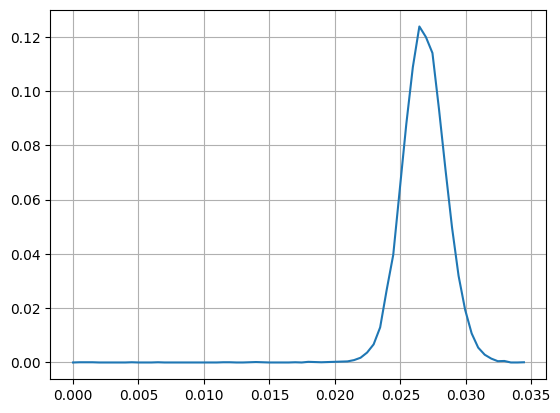

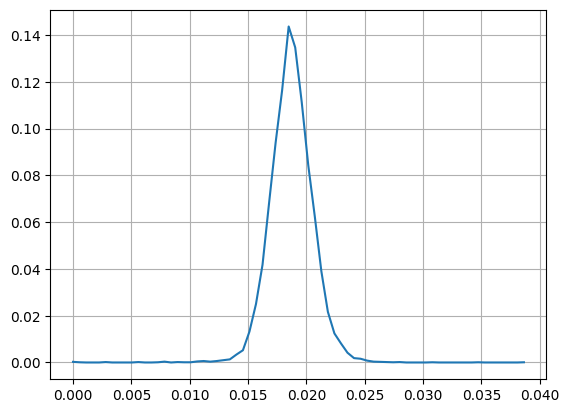

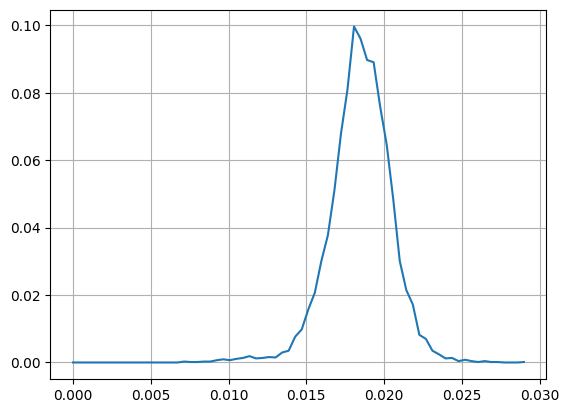

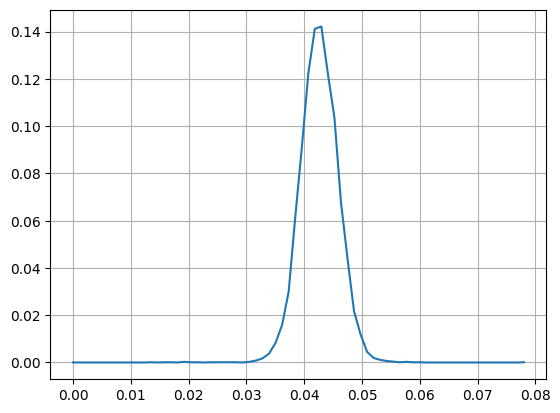

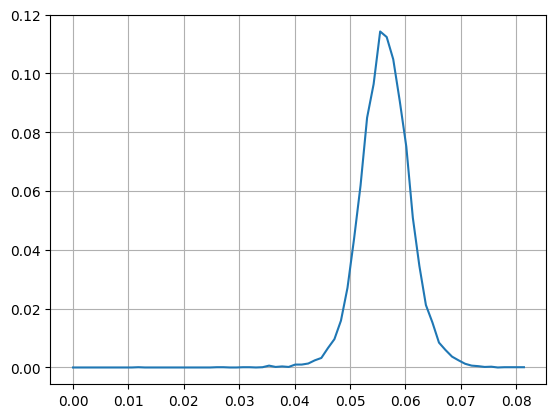

In [332]:
def hist_x_given_y(data, x, y, nbins=70):
    for file in [files[-1]]:
        maxy = np.max(data[y])
        yvals = np.arange(0,maxy+maxy/nbins, maxy/nbins)
        sd_y = data.groupby(pd.cut(data[y], yvals))[x].count()
        p_x_given_y = sd_y.to_numpy()/np.sum(sd_y)
        #print([i for i in np.arange(0,maxy, maxy/10)])
        plt.plot([i for i in np.arange(0,maxy, maxy/nbins)], p_x_given_y)
        plt.grid()
        plt.show()
    return np.array([y for y in yvals[0:-1]]), p_x_given_y

def mean_std(xi, pxi):
    mean = np.sum(xi*pxi)
    std = np.sum(pxi*(xi-mean)*(xi-mean))
    return mean, math.sqrt(std)



means, stds=({}, {})
for file in files:
    lvals, p_l_given_sb = hist_x_given_y(Data[file], 'sb', 'lambda')
    means[file], stds[file] = mean_std(lvals, p_l_given_sb)



# for i,j in zip(lvals, p_l_given_sb):
#     print(i,j)

    
    #Data[file].groupby(pd.cut(Data[file]["lambda"], np.arange(0, 0.1+0.01, 0.01)))['sd'].count()
#data.groupby(pd.cut(data['sb'], np.arange(0,maxl+maxl/10, maxl/10)))['lambda'].count()

glucose_12aa.txt		0.036809474054361475	0.0021003861812793788
glucose_6aa.txt		0.032612827138446404	0.002202608291239941
glucose.txt		0.02679342359548012	0.0017544215597014405
glycerol.txt		0.01871348984425492	0.001863982708382681
sorbitol.txt		0.018475164537149005	0.001994664305443772
synthetic_rich.txt		0.0426106815984556	0.003308797750114229
TSB.txt		0.05634146569345882	0.00453232023595221


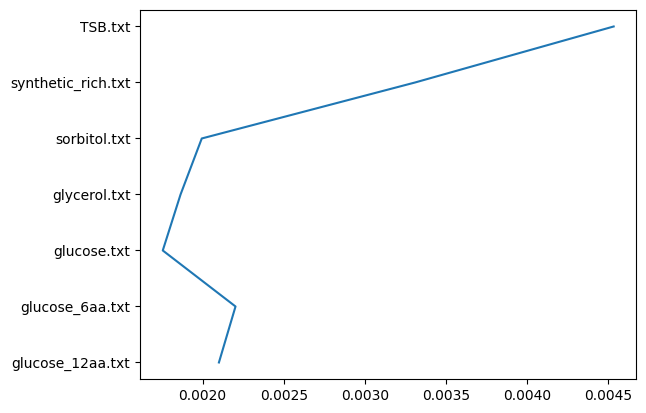

In [337]:
for file in files:
    print(f'{file}\t\t{means[file]}\t{stds[file]}')
plt.plot(stds.values(), stds.keys())

In [304]:
0.34**2

0.11560000000000002

In [208]:
# Assuming df is your DataFrame and it contains columns 'td' and 'sd'
# Step 1: Group by 'td' and count occurrences of 'sd' for each 'td'
grouped = Data[file].groupby(by='lambda')['sd'].value_counts(normalize=True).reset_index(name='probability')

# Step 2: Rename the columns for clarity>>> df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()
grouped.columns = ['td', 'sd', 'conditional_probability']

print(grouped.head())

         td     sd  conditional_probability
0  0.012629  8.645                      1.0
1  0.026312  8.645                      1.0
2  0.028046  6.175                      1.0
3  0.031616  7.215                      1.0
4  0.032774  5.330                      1.0


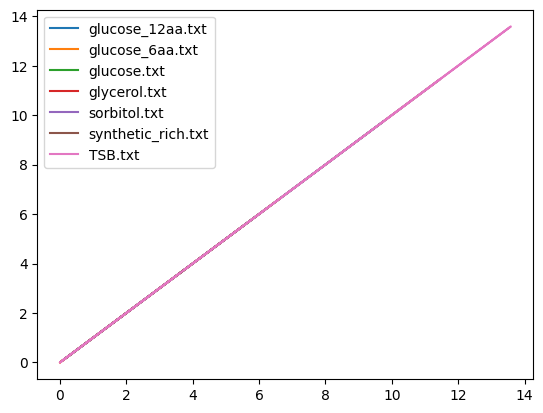

In [331]:
for file in files:
    plt.plot((Data[file]['sd']-Data[file]['sb']), Data[file]['deltas'], label=file)
    plt.legend(loc='best')
plt.show()

234


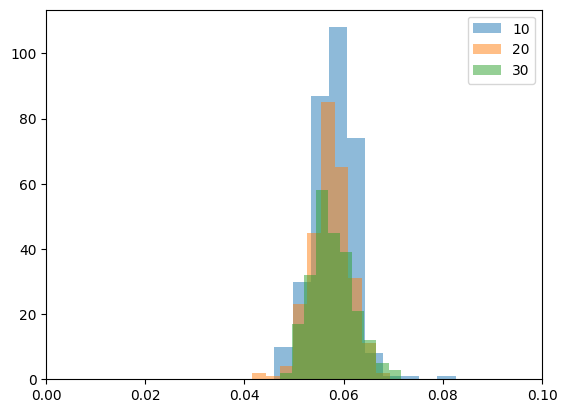

In [363]:
# for file in files:
#     plt.hist(Data[file]['lambda'],bins=50)

for ch in Data[files[0]]['ChID'].unique()[0:3]:
    plt.hist(Data[file][Data[file]['ChID']==ch]['lambda'],alpha=0.5, label=ch)
    plt.xlim([0,0.1])
    plt.legend(loc='best')



In [369]:
print((Data[file][Data[file]['ChID']==30]['lambda']).count()*110/320)

80.4375
